<a href="https://colab.research.google.com/github/rohan-dot/Rossmann-Sales-/blob/main/Rohan_Datta_Purkayastha_Team_4_Capstone_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 4/Week 1/Capstone Project 2/Data & Resources/Rossmann Stores Data.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df2 = pd.read_csv('/content/drive/MyDrive/Alma Submission/AlmaBetter/Cohort Aravali/Module 4/Week 1/Capstone Project 2/Data & Resources/store.csv')

In [5]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
df1.Store.unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [7]:
df1.shape

(1017209, 9)

In [8]:
df2.shape

(1115, 10)

In [9]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# Preliminary EDA

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


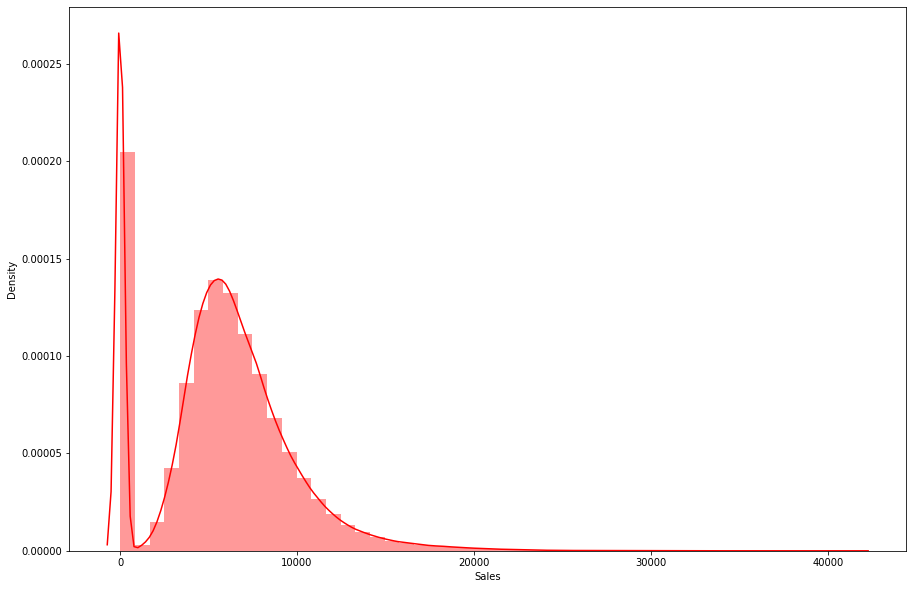

In [10]:
# Dependent variable 'Sale'
plt.figure(figsize=(15,10))
sns.distplot(df1['Sales'],color="r")


In [11]:
 df1.groupby('Store')['Sales'].sum()

Store
1        3716854
2        3883858
3        5408261
4        7556507
5        3642818
          ...   
1111     4091076
1112     7974294
1113     5196242
1114    16202585
1115     4922229
Name: Sales, Length: 1115, dtype: int64

In [12]:
categorical_features = ['Open','Promo','StateHoliday','SchoolHoliday']

In [13]:
df1.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

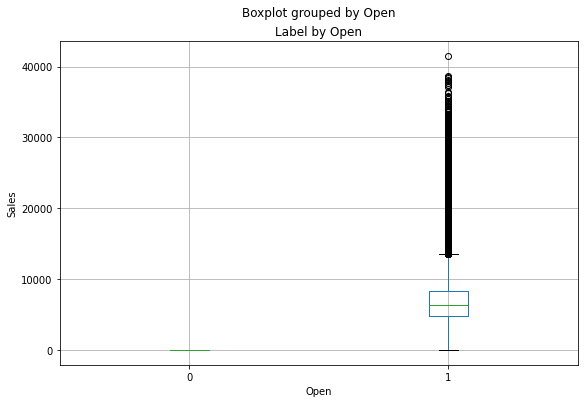

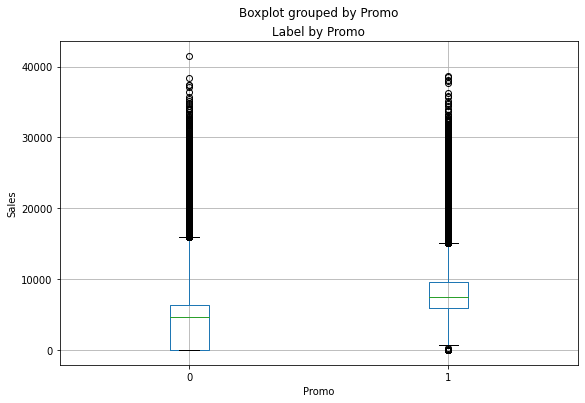

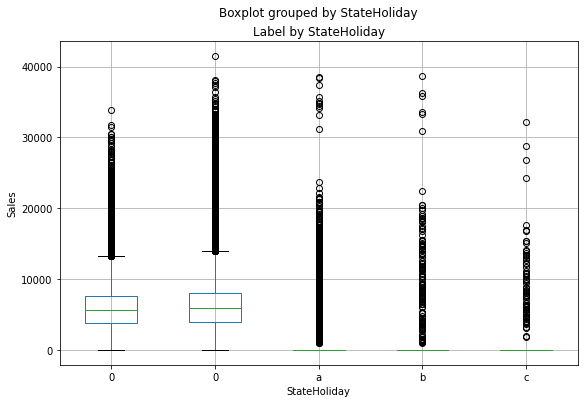

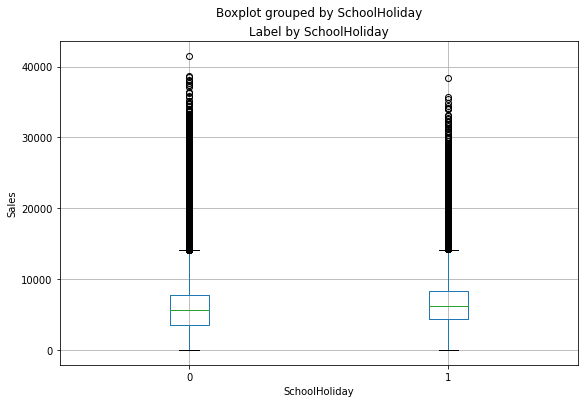

In [14]:
# plot a boxplot for the label by each categorical feature  

for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df1.boxplot(column = 'Sales', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Sales")
plt.show()

# Let's merge the two dataset

In [15]:
df2.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [16]:
df2.shape

(1115, 10)

In [17]:
df3 = pd.merge(df1, df2, on = 'Store', how = 'left')

In [18]:
df3

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [19]:
df3['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [20]:
df3[df3['PromoInterval'].isna()]['Promo2'].unique()  

array([0])

In [21]:
df3[df3['Promo2SinceYear'].isna()]['Promo2'].unique()

array([0])

In [22]:
df3[df3['Promo2SinceWeek'].isna()]['Promo2'].unique()

array([0])

# From the above analysis we see that null values in columns "Promo2SinceWeek", "Promo2SinceYear" and "PromoInterval" are coming because there is no continuation in Promo i.e Promo2 is 0. So, we can fill all null values in the above three columns with 0.

# In Promo2SinceWeek,Promo2SinceYear and PromoInterval columns, "NULL" is presented as one of the category. This should not be considered a missing value, but rather as “not applicable”. For example, if a value in “PromoInterval” is defined as “NULL” it means there is no promointerval as there is no continuation in Promo.

In [23]:
df3['Promo2SinceWeek'].fillna(0,inplace = True)
df3['Promo2SinceYear'].fillna(0,inplace = True)
df3['PromoInterval'].fillna(0,inplace = True)

In [24]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [25]:
df2.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [26]:
df2[df2['CompetitionDistance'].isna()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [27]:
df3['CompetitionOpenSinceYear'].unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [28]:
df3.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


# Lets first look for null values 

In [29]:
df3.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
dtype: int64

# Lets see for any patterns in null values

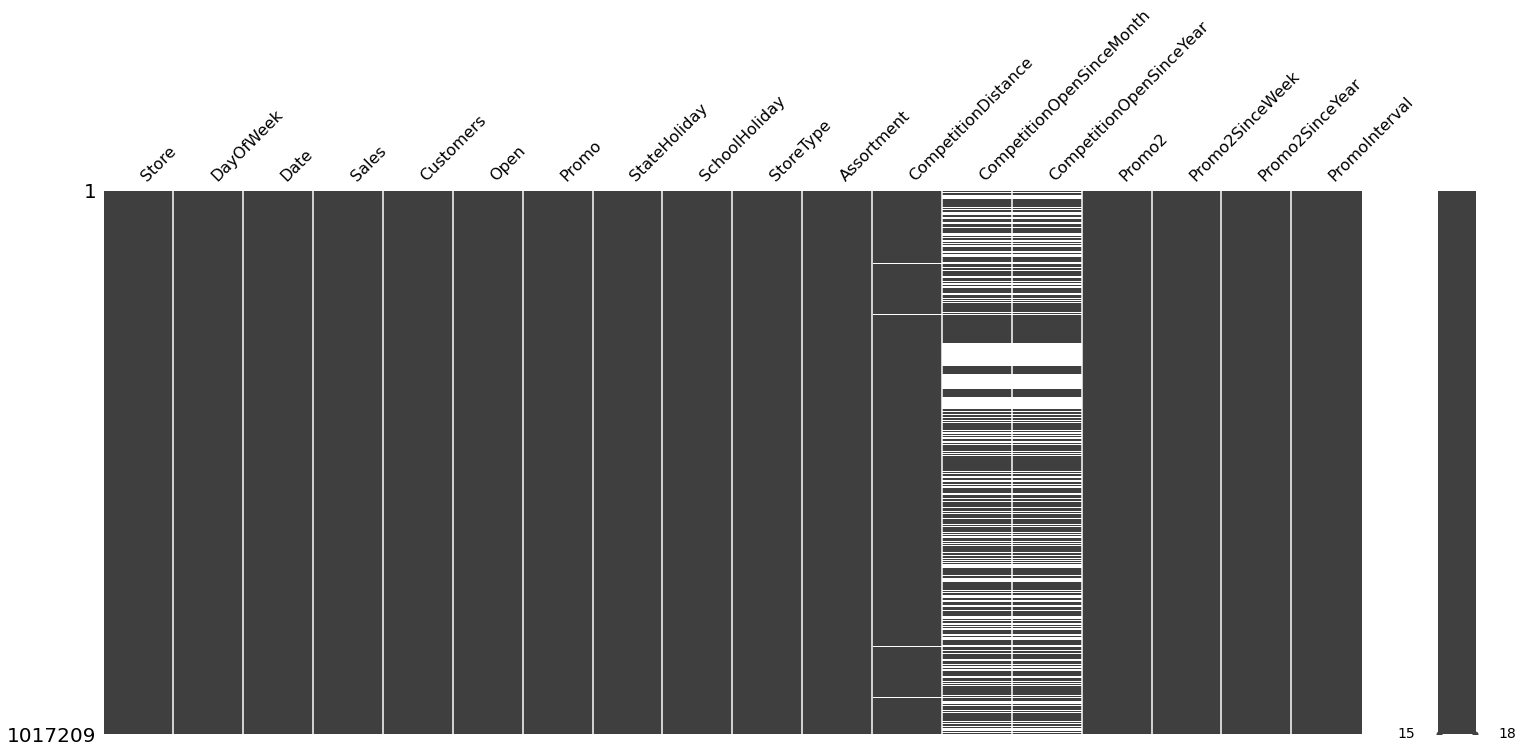

In [30]:
import missingno as msno
msno.matrix(df3)

In [31]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [32]:
df3[df3['CompetitionDistance'].isna()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,5,2015-07-31,10052,973,1,1,0,1,d,a,NaN,NaN,NaN,0,0.0,0.0,0
621,622,5,2015-07-31,6306,540,1,1,0,1,a,c,NaN,NaN,NaN,0,0.0,0.0,0
878,879,5,2015-07-31,6000,466,1,1,0,0,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1405,291,4,2015-07-30,9030,883,1,1,0,1,d,a,NaN,NaN,NaN,0,0.0,0.0,0
1736,622,4,2015-07-30,5412,406,1,1,0,1,a,c,NaN,NaN,NaN,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015601,622,3,2013-01-02,4080,451,1,0,0,1,a,c,NaN,NaN,NaN,0,0.0,0.0,0
1015858,879,3,2013-01-02,3077,326,1,0,0,1,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1016385,291,2,2013-01-01,0,0,0,0,a,1,d,a,NaN,NaN,NaN,0,0.0,0.0,0
1016716,622,2,2013-01-01,0,0,0,0,a,1,a,c,NaN,NaN,NaN,0,0.0,0.0,0


In [33]:
dataset = df3.copy()

# We can impute null values in the "CompetitionDistance" column with its mean value based on the type of store.

In [34]:
dataset['CompetitionDistance'] = dataset['CompetitionDistance'].fillna(dataset.groupby('StoreType')['CompetitionDistance'].transform('mean'))

In [35]:
dataset['CompetitionDistance'].isnull().sum()

0

# For "CompetitonOpenSinceMonth" and "CompetitionOpenSinceYear" columns we can impute null values with forward fill and backward fill method

In [36]:
# Replacing missing values in Competition open since month by ffill, limit = 2
dataset.fillna(method='ffill', limit = 2, inplace = True)

In [37]:
# Filling rest values using backfill. So done manually
dataset.fillna(method='backfill', inplace = True)

In [38]:
dataset.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    1
CompetitionOpenSinceYear     1
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [39]:
# 1 value was not filled
dataset['CompetitionOpenSinceMonth'] = dataset['CompetitionOpenSinceMonth'].fillna(4)

In [40]:
# 1 value was not filled. So done manually
dataset['CompetitionOpenSinceYear'] = dataset['CompetitionOpenSinceYear'].fillna(2011)

In [41]:
dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


# Now we have a clean dataset

# Let's begin with some EDA on our clean dataset

# As we want to predict sales for only those shop which are open, so we will be subsetting our dataset accordingly.

In [42]:
dataset = dataset[dataset['Open']==1]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


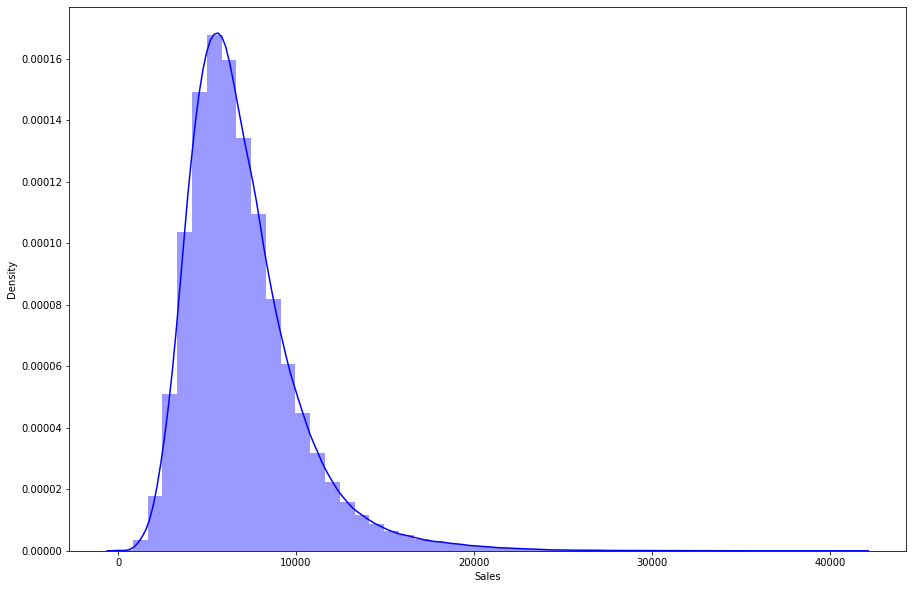

In [43]:
# Dependent variable 'Sale'
plt.figure(figsize=(15,10))
sns.distplot(dataset['Sales'],color="b")

In [44]:
categorical_features = ['Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment', 'Promo2']

In [45]:
dataset.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [46]:
dataset['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [47]:
dataset['StateHoliday']= dataset['StateHoliday'].replace(0,'0')

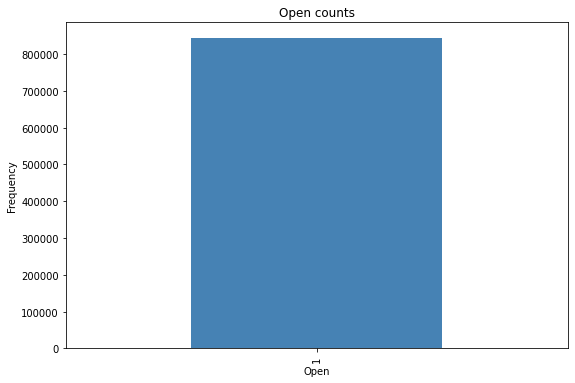

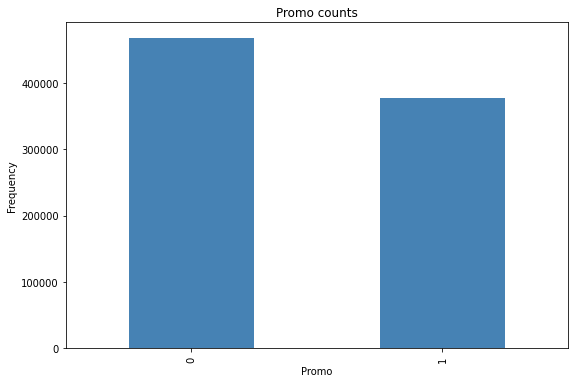

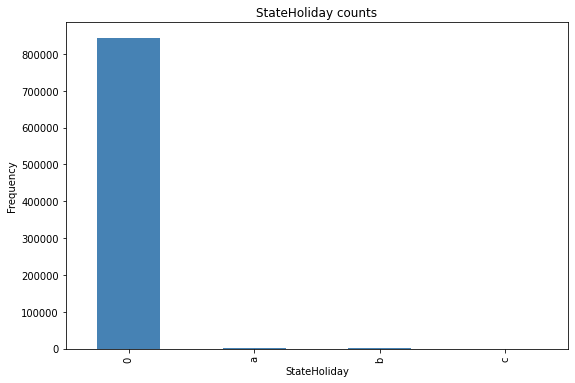

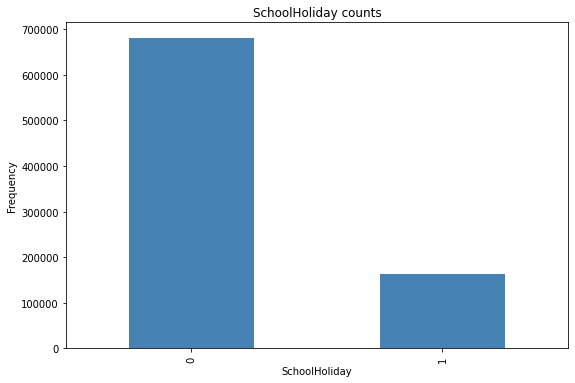

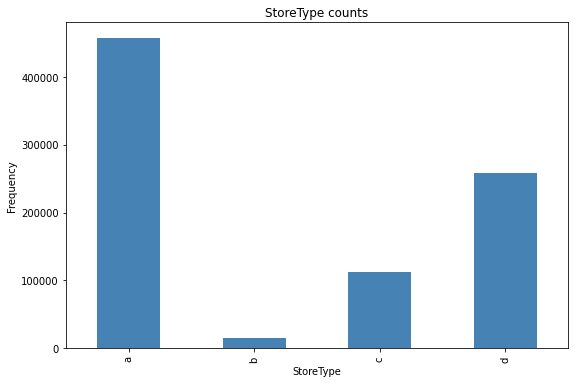

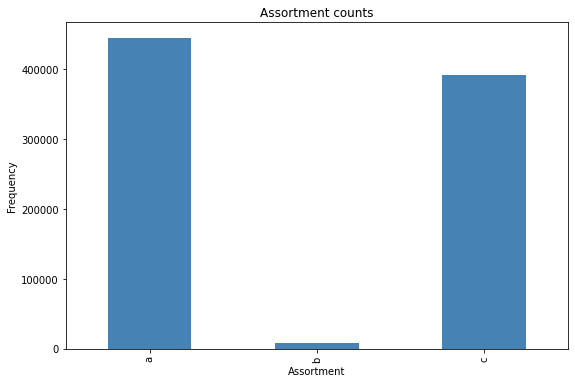

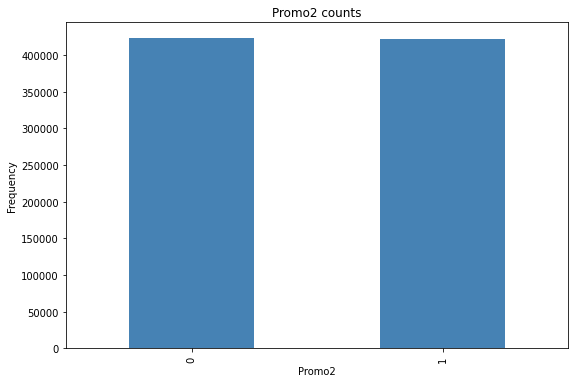

In [48]:
# Count of each categorical feature
for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

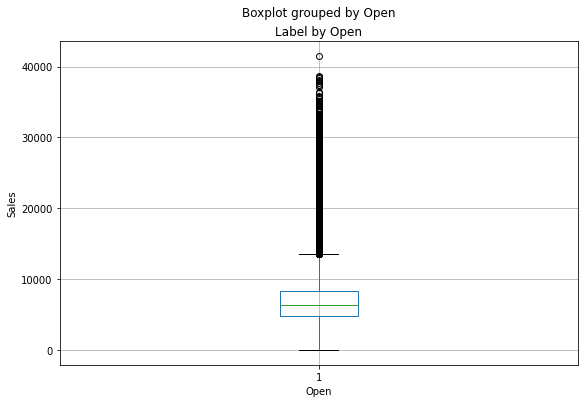

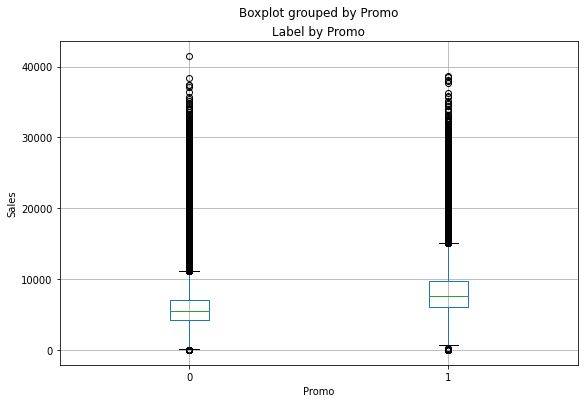

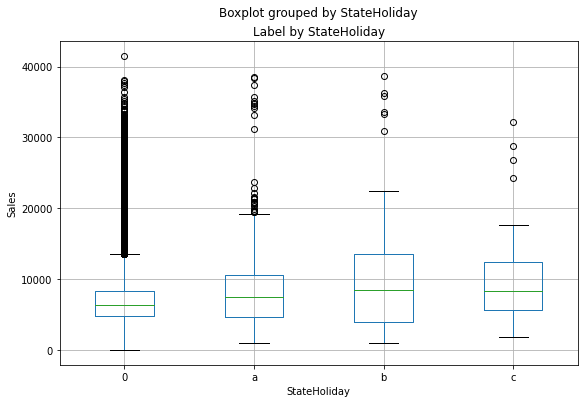

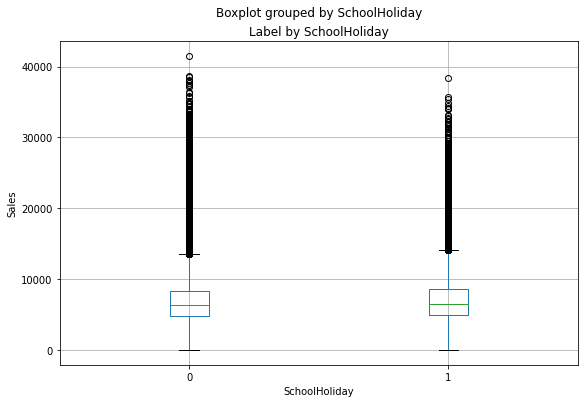

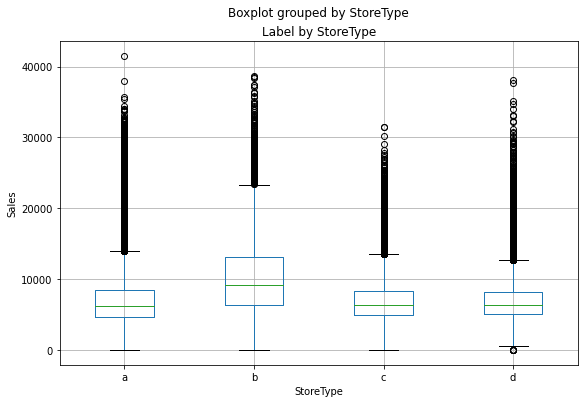

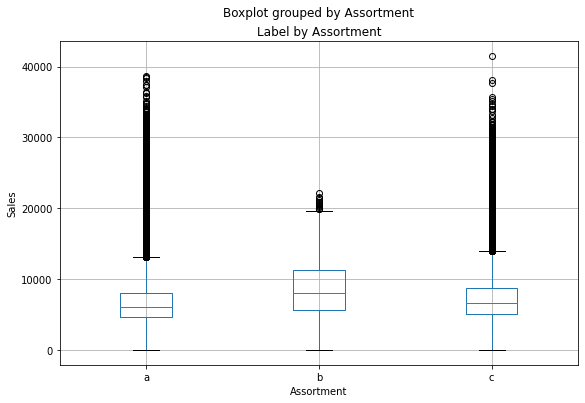

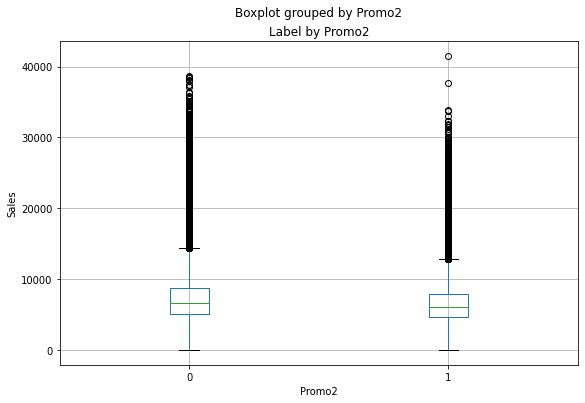

In [49]:
# plot a boxplot for the label by each categorical feature  

for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'Sales', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Sales")
plt.show()

In [50]:
dataset.groupby('Date')['Sales'].sum()

Date
2013-01-01       97235
2013-01-02     6949829
2013-01-03     6347820
2013-01-04     6638954
2013-01-05     5951593
                ...   
2015-07-27    10707292
2015-07-28     9115073
2015-07-29     8499962
2015-07-30     8798854
2015-07-31    10109742
Name: Sales, Length: 942, dtype: int64

In [51]:
dataset.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'], dtype='object')

In [52]:
numerical_features = ['Customers','CompetitionDistance']

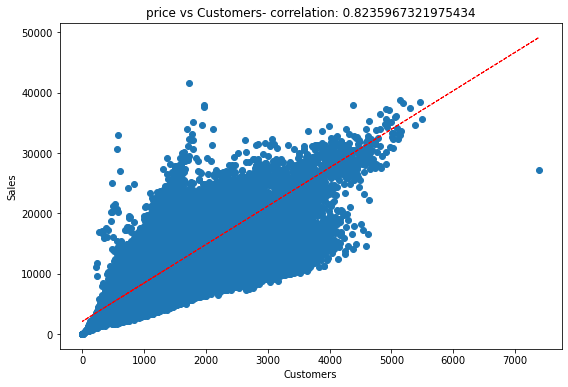

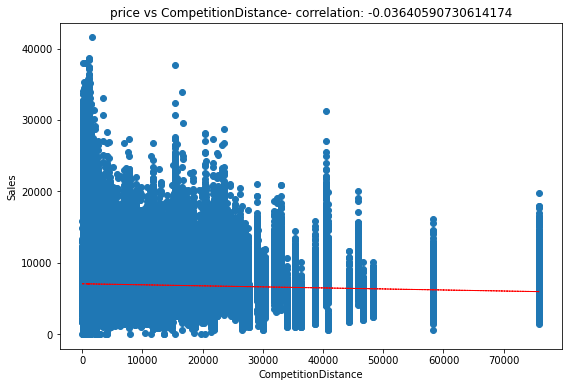

In [53]:
  for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['Sales'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

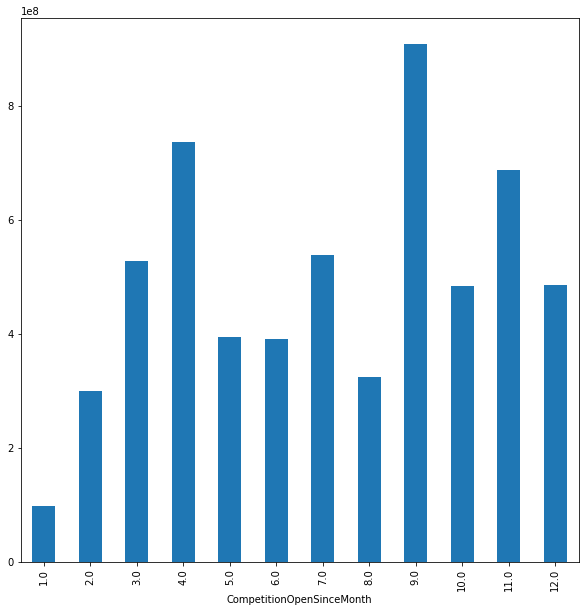

In [54]:
plt.figure(figsize=(10,10))
ax = dataset.groupby('CompetitionOpenSinceMonth')['Sales'].sum()
ax.plot(kind = 'bar')

In [55]:
dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


# Here we see an anomaly!
# There are few observations in which we see that the shop is open but there is no Sale and we should drop those observation.

In [56]:
dataset[dataset['Open'] == 1][dataset['Sales']==0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
86825,971,5,2015-05-15,0,0,1,0,0,1,c,a,1140.0,5.0,2011.0,1,14.0,2012.0,"Mar,Jun,Sept,Dec"
142278,674,4,2015-03-26,0,0,1,0,0,0,a,a,2640.0,12.0,2005.0,1,31.0,2013.0,"Feb,May,Aug,Nov"
196938,699,4,2015-02-05,0,0,1,1,0,0,a,a,180.0,5.0,2011.0,1,5.0,2013.0,"Jan,Apr,Jul,Oct"
322053,708,3,2014-10-01,0,0,1,1,0,0,c,c,11470.0,10.0,2009.0,1,18.0,2014.0,"Jan,Apr,Jul,Oct"
330176,357,1,2014-09-22,0,0,1,0,0,0,a,a,2060.0,10.0,2008.0,0,0.0,0.0,0
340348,227,4,2014-09-11,0,0,1,0,0,0,a,a,2370.0,5.0,2015.0,0,0.0,0.0,0
340860,835,4,2014-09-11,0,0,1,0,0,0,a,a,2890.0,12.0,2007.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
341795,835,3,2014-09-10,0,0,1,0,0,0,a,a,2890.0,12.0,2007.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
346232,548,5,2014-09-05,0,0,1,1,0,1,d,c,3760.0,2.0,2009.0,0,0.0,0.0,0
346734,28,4,2014-09-04,0,0,1,1,0,0,a,a,1200.0,10.0,2014.0,1,6.0,2015.0,"Mar,Jun,Sept,Dec"


In [57]:
Anomaly_Subset = dataset[dataset['Open'] == 1][dataset['Sales']==0]

In [58]:
dataset = dataset.drop(Anomaly_Subset.index)

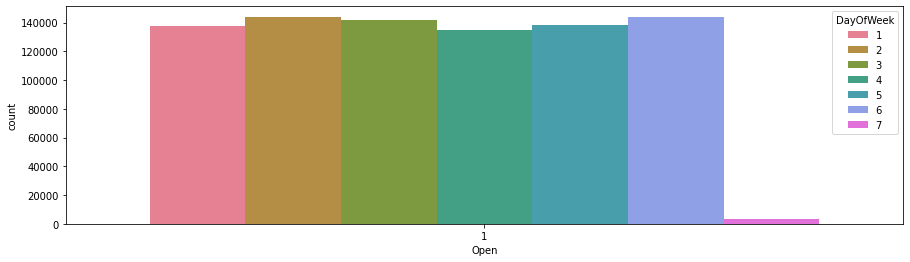

In [59]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=dataset,palette="husl", ax=axis1)


# Feature Engineering

In [113]:
dataset_fr = dataset.copy()

In [114]:
import datetime

In [115]:
# Create Year and Month columns
dataset_fr['Year']  = dataset_fr['Date'].apply(lambda x: int(str(x)[:4]))
dataset_fr['Month'] = dataset_fr['Date'].apply(lambda x: int(str(x)[5:7]))
dataset_fr['Day'] = dataset_fr['Date'].apply(lambda x : int(str(x)[8:]))

In [116]:
dataset_fr.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31


In [117]:
# Assign Date column to Date(Year-Month) instead of (Year-Month-Day)
# this column will be useful in analysis and visualization
dataset_fr['Date'] = dataset_fr['Date'].apply(lambda x: (str(x)[:7]))

In [118]:
dataset_fr.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,2,5,2015-07,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,2015-07,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,2015-07,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31
4,5,5,2015-07,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31


In [119]:
dataset_fr['Month_Name'] = dataset_fr['Month'].apply(lambda x: datetime.date(1900, x, 1).strftime('%b'))

In [120]:
def checkpromomonth(row):
 if row['PromoInterval'] != 0:
  if (row['Month_Name'] in row['PromoInterval']) :
      return 1
  else:
      return 0
 else:
   return 0

In [121]:
dataset['PromoInterval']

0                        0
1          Jan,Apr,Jul,Oct
2          Jan,Apr,Jul,Oct
3                        0
4                        0
                ...       
1016776                  0
1016827                  0
1016863    Jan,Apr,Jul,Oct
1017042                  0
1017190                  0
Name: PromoInterval, Length: 844338, dtype: object

In [122]:
dataset_fr['IsPromoMonth'] =  dataset_fr.apply(lambda row: checkpromomonth(row) ,axis=1)

In [123]:
dataset_fr.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,Month_Name,IsPromoMonth
0,1,5,2015-07,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31,Jul,0
1,2,5,2015-07,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,Jul,1
2,3,5,2015-07,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,Jul,1
3,4,5,2015-07,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0,2015,7,31,Jul,0
4,5,5,2015-07,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0,2015,7,31,Jul,0


In [124]:
dataset_fr.drop(['Month_Name'],axis =1 , inplace = True)

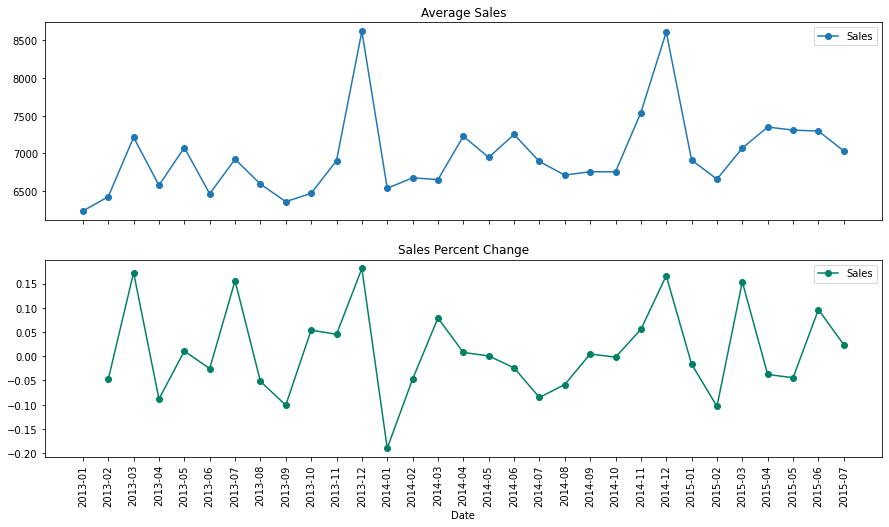

In [125]:
# group by date and get average sales, and precent change
average_sales    = dataset_fr.groupby('Date')["Sales"].mean()
pct_change_sales = dataset_fr.groupby('Date')["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average sales over time(year-month)
ax1 = average_sales.plot(legend=True,ax=axis1,marker='o',title="Average Sales")
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)

# plot precent change for sales over time(year-month)
ax2 = pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap="summer",title="Sales Percent Change")
# ax2.set_xticks(range(len(pct_change_sales)))
# ax2.set_xticklabels(pct_change_sales.index.tolist(), rotation=90)

### As we see from the above chart that the last record was taken on 2015-7. So we can create a column which will account the total competition month.

In [126]:
dataset_fr['CompetitionOpenSinceYear'] = 2015 - dataset_fr['CompetitionOpenSinceYear']

In [127]:
dataset_fr['Total_competition_months'] = (dataset_fr['CompetitionOpenSinceYear'] * 12) -(dataset_fr['CompetitionOpenSinceMonth']-1) + 7

In [128]:
# Removing both original columns
dataset_fr.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'],axis = 1, inplace=True)

# Doing same for Promo columns

In [129]:
def Total_promo_year(float):
  if float == 0:
    return 0
  else:
    return int(2015 - float)

In [130]:
def Total_promo_week(float):
  if float == 0:
    return 0
  else:
    return 28 - int(float-1)

In [131]:
dataset_fr['Total_promo_years'] = dataset_fr['Promo2SinceYear'].apply(Total_promo_year)

In [132]:
dataset_fr['Total_promo_weeks'] = dataset_fr['Promo2SinceWeek'].apply(Total_promo_week)

In [133]:
dataset_fr['Total_promo_weeks'] = (dataset_fr['Total_promo_years']*52) + dataset_fr['Total_promo_weeks']

In [134]:
dataset_fr.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,IsPromoMonth,Total_competition_months,Total_promo_years,Total_promo_weeks
0,1,5,2015-07,5263,555,1,1,0,1,c,a,1270.0,0,0.0,0.0,0,2015,7,31,0,83.0,0,0
1,2,5,2015-07,6064,625,1,1,0,1,a,a,570.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,1,93.0,5,276
2,3,5,2015-07,8314,821,1,1,0,1,a,a,14130.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,1,104.0,4,223
3,4,5,2015-07,13995,1498,1,1,0,1,c,c,620.0,0,0.0,0.0,0,2015,7,31,0,71.0,0,0
4,5,5,2015-07,4822,559,1,1,0,1,a,a,29910.0,0,0.0,0.0,0,2015,7,31,0,4.0,0,0


In [135]:
# Dropping other columns
dataset_fr.drop(['Promo2SinceWeek','Promo2SinceYear','Total_promo_years'],axis=1, inplace=True)

In [136]:
dataset_fr.drop(['Date'], axis = 1, inplace = True )

In [137]:
dataset_fr.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Year,Month,Day,IsPromoMonth,Total_competition_months,Total_promo_weeks
0,1,5,5263,555,1,1,0,1,c,a,1270.0,0,0,2015,7,31,0,83.0,0
1,2,5,6064,625,1,1,0,1,a,a,570.0,1,"Jan,Apr,Jul,Oct",2015,7,31,1,93.0,276
2,3,5,8314,821,1,1,0,1,a,a,14130.0,1,"Jan,Apr,Jul,Oct",2015,7,31,1,104.0,223
3,4,5,13995,1498,1,1,0,1,c,c,620.0,0,0,2015,7,31,0,71.0,0
4,5,5,4822,559,1,1,0,1,a,a,29910.0,0,0,2015,7,31,0,4.0,0


In [138]:
avg_customer = dataset_fr.groupby(['Store'])['Customers'].mean()

In [139]:
type(avg_customer)

pandas.core.series.Series

In [140]:
avg_customer = avg_customer.to_frame().reset_index().rename(columns = {'Customers':'Average_Customers'})

In [141]:
d = pd.merge(dataset_fr,avg_customer, on = 'Store', how = 'left')

In [142]:
d.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Year,Month,Day,IsPromoMonth,Total_competition_months,Total_promo_weeks,Average_Customers
0,1,5,5263,555,1,1,0,1,c,a,1270.0,0,0,2015,7,31,0,83.0,0,564.049936
1,2,5,6064,625,1,1,0,1,a,a,570.0,1,"Jan,Apr,Jul,Oct",2015,7,31,1,93.0,276,583.998724
2,3,5,8314,821,1,1,0,1,a,a,14130.0,1,"Jan,Apr,Jul,Oct",2015,7,31,1,104.0,223,750.077022
3,4,5,13995,1498,1,1,0,1,c,c,620.0,0,0,2015,7,31,0,71.0,0,1321.752551
4,5,5,4822,559,1,1,0,1,a,a,29910.0,0,0,2015,7,31,0,4.0,0,537.340180


In [143]:
avg_sales = dataset_fr.groupby(['Store'])['Sales'].mean()

In [144]:
type(avg_sales)

pandas.core.series.Series

In [145]:
avg_sales.to_frame().reset_index().rename(columns = {'Sales' : 'Average_Sales'})

,Store,Average_Sales
0,1,4759.096031
1,2,4953.900510
2,3,6942.568678
3,4,9638.401786
4,5,4676.274711
...,...,...
1110,1111,5251.702182
1111,1112,10236.577664
1112,1113,6627.859694
1113,1114,20666.562500


In [146]:
avg_sales = avg_sales.to_frame().reset_index().rename(columns = {'Sales': 'Average_Sales'})

In [147]:
d = pd.merge(d,avg_sales, on = 'Store', how = 'left')

In [148]:
d.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Year,Month,Day,IsPromoMonth,Total_competition_months,Total_promo_weeks,Average_Customers,Average_Sales
0,1,5,5263,555,1,1,0,1,c,a,1270.0,0,0,2015,7,31,0,83.0,0,564.049936,4759.096031
1,2,5,6064,625,1,1,0,1,a,a,570.0,1,"Jan,Apr,Jul,Oct",2015,7,31,1,93.0,276,583.998724,4953.900510
2,3,5,8314,821,1,1,0,1,a,a,14130.0,1,"Jan,Apr,Jul,Oct",2015,7,31,1,104.0,223,750.077022,6942.568678
3,4,5,13995,1498,1,1,0,1,c,c,620.0,0,0,2015,7,31,0,71.0,0,1321.752551,9638.401786
4,5,5,4822,559,1,1,0,1,a,a,29910.0,0,0,2015,7,31,0,4.0,0,537.340180,4676.274711


In [150]:
dataset_fr = d

In [152]:
dataset_fr.drop(['Customers','Store','Year'], axis = 1, inplace = True)

In [153]:
dataset_fr.head()

,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Month,Day,IsPromoMonth,Total_competition_months,Total_promo_weeks,Average_Customers,Average_Sales
0,5,5263,1,1,0,1,c,a,1270.0,0,0,7,31,0,83.0,0,564.049936,4759.096031
1,5,6064,1,1,0,1,a,a,570.0,1,"Jan,Apr,Jul,Oct",7,31,1,93.0,276,583.998724,4953.900510
2,5,8314,1,1,0,1,a,a,14130.0,1,"Jan,Apr,Jul,Oct",7,31,1,104.0,223,750.077022,6942.568678
3,5,13995,1,1,0,1,c,c,620.0,0,0,7,31,0,71.0,0,1321.752551,9638.401786
4,5,4822,1,1,0,1,a,a,29910.0,0,0,7,31,0,4.0,0,537.340180,4676.274711


# Detecting Anomalies using Isolation Forest only for sales column

In [154]:
from sklearn.ensemble import IsolationForest

In [158]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.005)
isolation_forest.fit(dataset['Sales'].values.reshape(-1, 1))
dataset_fr['anomaly_score_univariate_sales'] = isolation_forest.decision_function(dataset_fr['Sales'].values.reshape(-1, 1))
dataset_fr['outlier_univariate_sales'] = isolation_forest.predict(dataset_fr['Sales'].values.reshape(-1, 1))

In [159]:
dataset_fr[dataset_fr['outlier_univariate_sales']==-1]

,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Month,Day,IsPromoMonth,Total_competition_months,Total_promo_weeks,Average_Customers,Average_Sales,anomaly_score_univariate_sales,outlier_univariate_sales
124,5,18227,1,1,0,1,a,a,760.0,0,0,7,31,0,116.0,0,1573.941327,11836.848214,-0.011196,-1
250,5,22205,1,1,0,1,a,c,340.0,0,0,7,31,0,11.0,0,2450.492940,19123.068036,-0.030404,-1
261,5,25774,1,1,0,1,b,a,1180.0,0,0,7,31,0,27.0,0,3402.010616,20718.515924,-0.030404,-1
318,5,19898,1,1,0,1,a,c,210.0,0,0,7,31,0,35.0,0,2063.123724,14834.461735,-0.030404,-1
333,5,17867,1,1,0,1,b,a,90.0,1,"Jan,Apr,Jul,Oct",7,31,1,84.0,102,2385.282378,13313.939490,-0.000505,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843730,3,20493,1,0,0,1,c,c,50.0,0,0,1,2,0,21.0,0,1782.911990,15530.605867,-0.030404,-1
843994,3,17934,1,0,0,1,a,c,1530.0,0,0,1,2,0,29.0,0,1717.901786,17961.914541,-0.002530,-1
844023,3,25357,1,0,0,1,a,a,140.0,0,0,1,2,0,113.0,0,3130.573980,21757.483418,-0.030404,-1
844048,3,20355,1,0,0,1,d,c,1200.0,0,0,1,2,0,93.0,0,1149.242765,18574.795820,-0.030404,-1


# Now, we need to remove these set of outliers as our original dataset is huge.

In [163]:
dataset_fr = dataset_fr[dataset_fr['outlier_univariate_sales']==1]

In [164]:
# Removing Isolation Forest columns
dataset_fr.drop(['anomaly_score_univariate_sales','outlier_univariate_sales'],axis = 1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

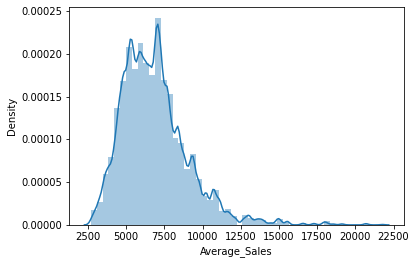

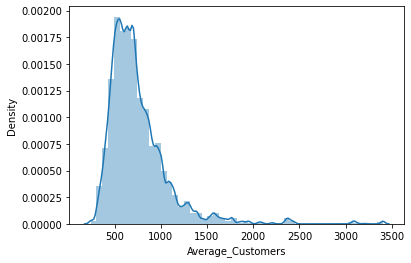

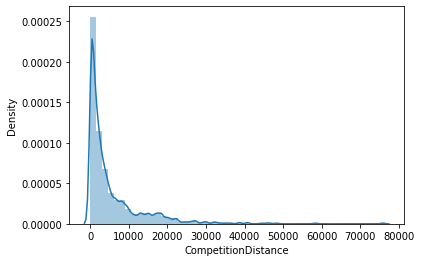

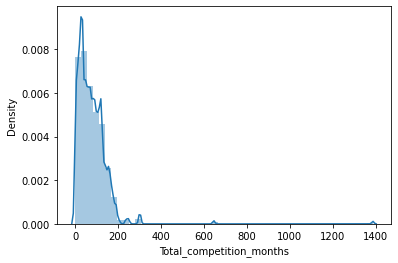

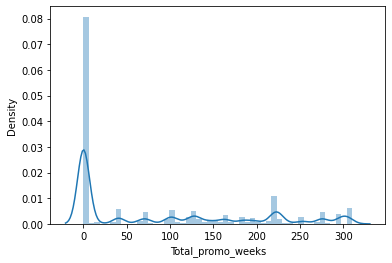

In [166]:
# Distributions
for col in ['Average_Sales', 'Average_Customers', 'CompetitionDistance', 'Total_competition_months','Total_promo_weeks']:
  plt.figure()
  sns.distplot(dataset_fr[col])

In [169]:
dataset_fr.drop(['Open'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


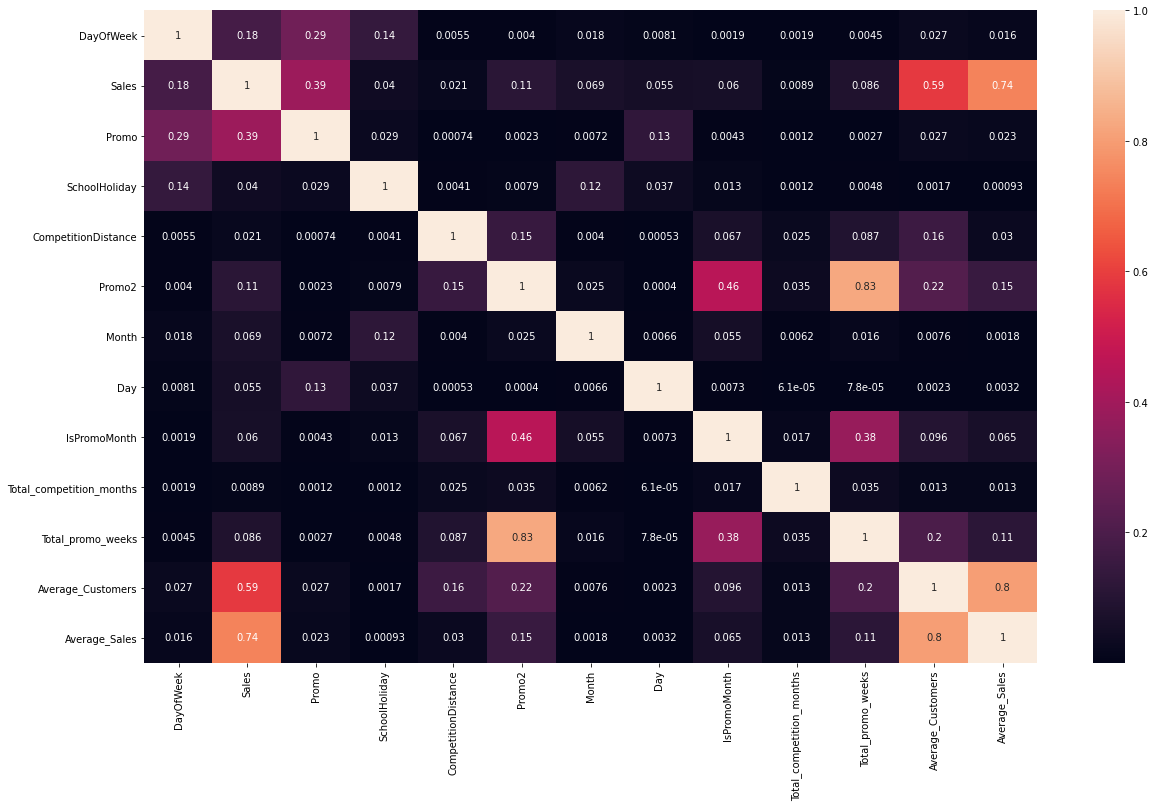

In [170]:
plt.subplots(figsize=(20,12))
sns.heatmap(dataset_fr.corr().abs(), annot=True)

In [171]:
dataset_fr.head()

,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Month,Day,IsPromoMonth,Total_competition_months,Total_promo_weeks,Average_Customers,Average_Sales
0,5,5263,1,0,1,c,a,1270.0,0,0,7,31,0,83.0,0,564.049936,4759.096031
1,5,6064,1,0,1,a,a,570.0,1,"Jan,Apr,Jul,Oct",7,31,1,93.0,276,583.998724,4953.900510
2,5,8314,1,0,1,a,a,14130.0,1,"Jan,Apr,Jul,Oct",7,31,1,104.0,223,750.077022,6942.568678
3,5,13995,1,0,1,c,c,620.0,0,0,7,31,0,71.0,0,1321.752551,9638.401786
4,5,4822,1,0,1,a,a,29910.0,0,0,7,31,0,4.0,0,537.340180,4676.274711


In [172]:
numerical_features = ['Total_competition_months','Total_promo_weeks','CompetitionDistance','Average_Customers','Average_Sales']

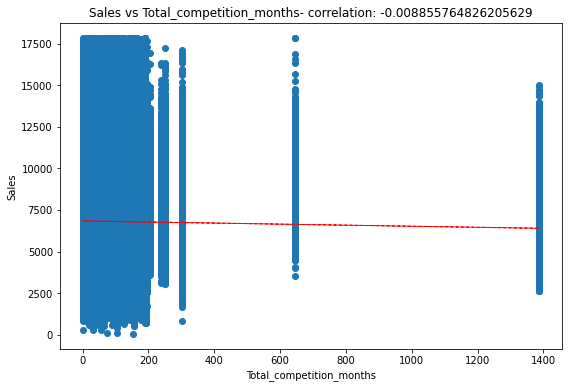

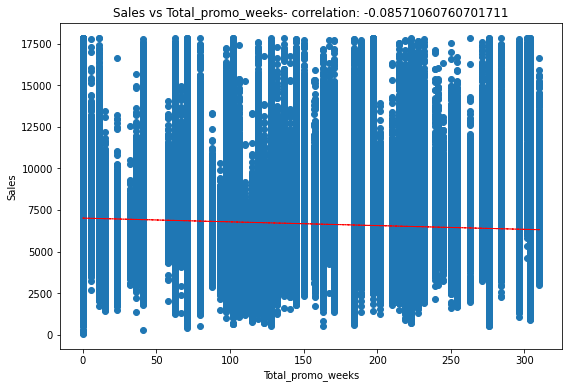

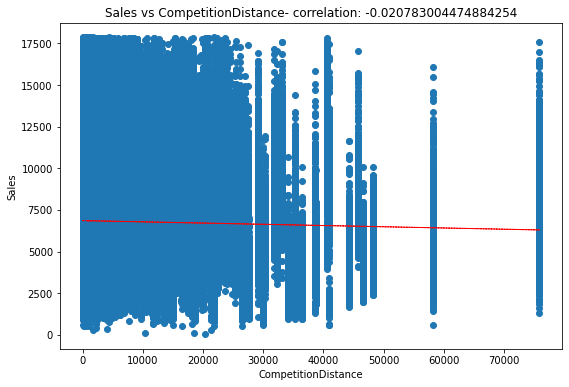

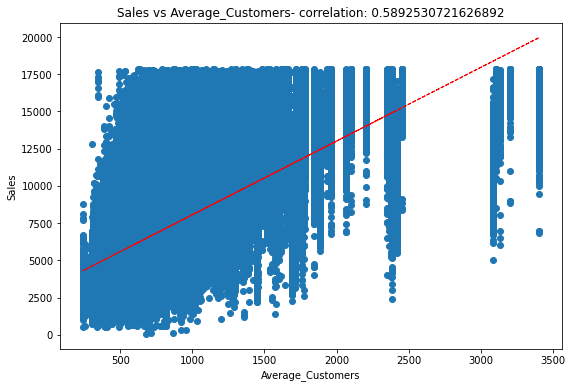

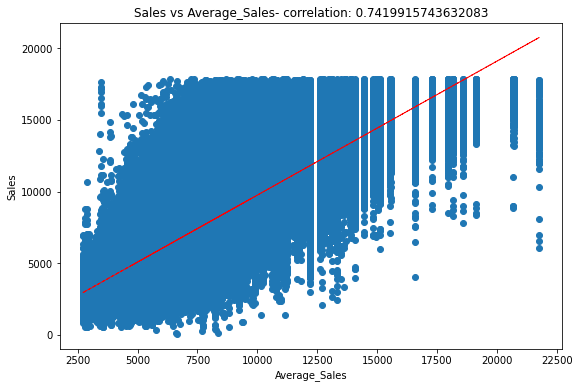

In [174]:
for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset_fr[col]
    label = dataset_fr['Sales']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Sales')
    ax.set_title('Sales vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset_fr[col], dataset_fr['Sales'], 1)
    y_hat = np.poly1d(z)(dataset_fr[col])

    plt.plot(dataset_fr[col], y_hat, "r--", lw=1)

plt.show()

# Data Preprocessing

In [175]:
dataset_pr = dataset_fr.copy()

In [176]:
dataset_pr.head()

,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Month,Day,IsPromoMonth,Total_competition_months,Total_promo_weeks,Average_Customers,Average_Sales
0,5,5263,1,0,1,c,a,1270.0,0,0,7,31,0,83.0,0,564.049936,4759.096031
1,5,6064,1,0,1,a,a,570.0,1,"Jan,Apr,Jul,Oct",7,31,1,93.0,276,583.998724,4953.900510
2,5,8314,1,0,1,a,a,14130.0,1,"Jan,Apr,Jul,Oct",7,31,1,104.0,223,750.077022,6942.568678
3,5,13995,1,0,1,c,c,620.0,0,0,7,31,0,71.0,0,1321.752551,9638.401786
4,5,4822,1,0,1,a,a,29910.0,0,0,7,31,0,4.0,0,537.340180,4676.274711


In [178]:
dataset_pr.head()

,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,PromoInterval,Month,Day,IsPromoMonth,Total_competition_months,Total_promo_weeks,Average_Customers,Average_Sales
0,5,5263,1,0,1,c,a,1270.0,0,0,7,31,0,83.0,0,564.049936,4759.096031
1,5,6064,1,0,1,a,a,570.0,1,"Jan,Apr,Jul,Oct",7,31,1,93.0,276,583.998724,4953.900510
2,5,8314,1,0,1,a,a,14130.0,1,"Jan,Apr,Jul,Oct",7,31,1,104.0,223,750.077022,6942.568678
3,5,13995,1,0,1,c,c,620.0,0,0,7,31,0,71.0,0,1321.752551,9638.401786
4,5,4822,1,0,1,a,a,29910.0,0,0,7,31,0,4.0,0,537.340180,4676.274711


In [179]:
dataset_pr.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [180]:
dataset_pr.SchoolHoliday.unique()

array([1, 0])

In [181]:
dataset_pr.StoreType.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [182]:
dataset_pr.Assortment.unique()

array(['a', 'c', 'b'], dtype=object)

In [183]:
dataset_pr = pd.get_dummies(dataset_pr,columns=['StateHoliday','StoreType','Assortment'], prefix = ['StateHoliday','StoreType','Assortment'], drop_first = True )

In [184]:
dataset_pr.head()

,DayOfWeek,Sales,Promo,SchoolHoliday,CompetitionDistance,Promo2,PromoInterval,Month,Day,IsPromoMonth,Total_competition_months,Total_promo_weeks,Average_Customers,Average_Sales,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c
0,5,5263,1,1,1270.0,0,0,7,31,0,83.0,0,564.049936,4759.096031,0,0,0,0,1,0,0,0
1,5,6064,1,1,570.0,1,"Jan,Apr,Jul,Oct",7,31,1,93.0,276,583.998724,4953.900510,0,0,0,0,0,0,0,0
2,5,8314,1,1,14130.0,1,"Jan,Apr,Jul,Oct",7,31,1,104.0,223,750.077022,6942.568678,0,0,0,0,0,0,0,0
3,5,13995,1,1,620.0,0,0,7,31,0,71.0,0,1321.752551,9638.401786,0,0,0,0,1,0,0,1
4,5,4822,1,1,29910.0,0,0,7,31,0,4.0,0,537.340180,4676.274711,0,0,0,0,0,0,0,0


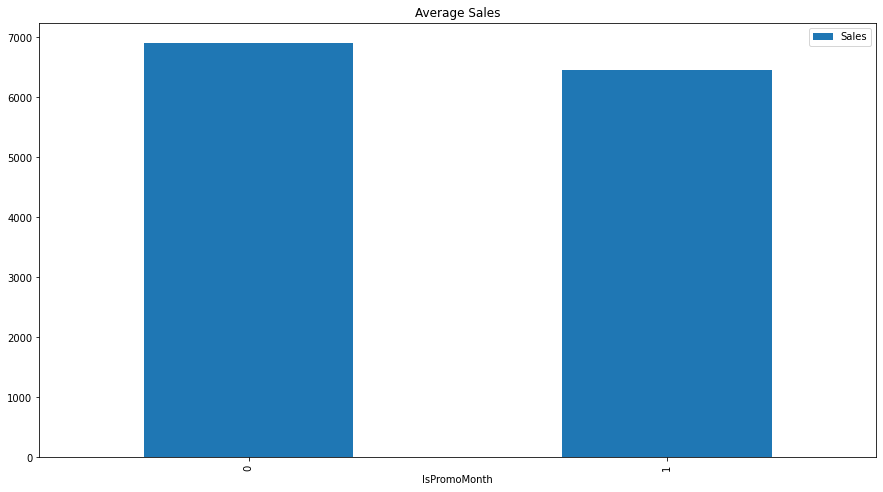

In [186]:
average_sales = dataset_pr.groupby('IsPromoMonth')["Sales"].mean()
fig, axis1 = plt.subplots(1,1,sharex=True,figsize=(15,8))

ax1 = average_sales.plot(legend=True,ax=axis1,title="Average Sales", kind = 'bar')

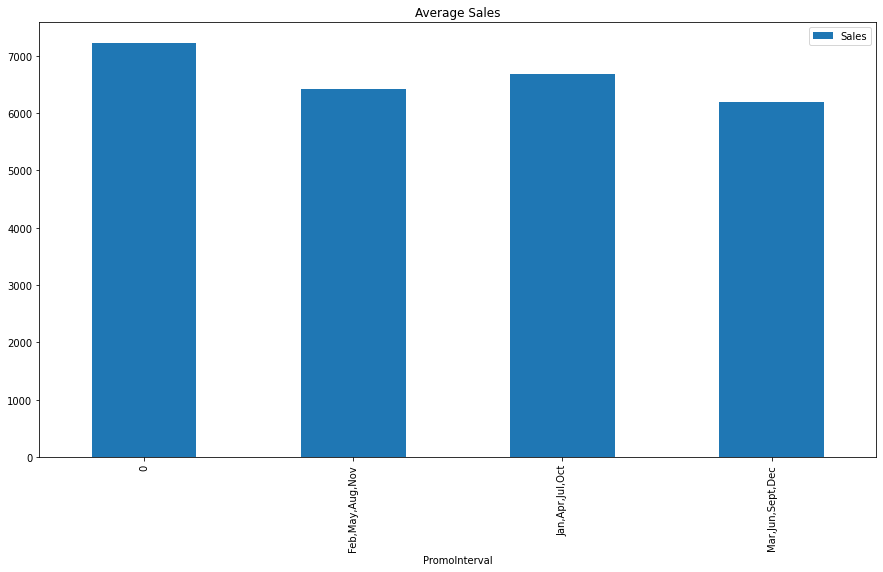

In [187]:
average_sales = dataset.groupby('PromoInterval')["Sales"].mean()
fig, axis1 = plt.subplots(1,1,sharex=True,figsize=(15,8))

ax1 = average_sales.plot(legend=True,ax=axis1,title="Average Sales", kind = 'bar')

In [188]:
dataset_pr = pd.get_dummies(dataset_pr,columns=['PromoInterval'], prefix = ['PromoInterval'], drop_first = True )

In [189]:
dataset_pr.head()

,DayOfWeek,Sales,Promo,SchoolHoliday,CompetitionDistance,Promo2,Month,Day,IsPromoMonth,Total_competition_months,Total_promo_weeks,Average_Customers,Average_Sales,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,5,5263,1,1,1270.0,0,7,31,0,83.0,0,564.049936,4759.096031,0,0,0,0,1,0,0,0,0,0,0
1,5,6064,1,1,570.0,1,7,31,1,93.0,276,583.998724,4953.900510,0,0,0,0,0,0,0,0,0,1,0
2,5,8314,1,1,14130.0,1,7,31,1,104.0,223,750.077022,6942.568678,0,0,0,0,0,0,0,0,0,1,0
3,5,13995,1,1,620.0,0,7,31,0,71.0,0,1321.752551,9638.401786,0,0,0,0,1,0,0,1,0,0,0
4,5,4822,1,1,29910.0,0,7,31,0,4.0,0,537.340180,4676.274711,0,0,0,0,0,0,0,0,0,0,0


In [190]:
dataset_pr.shape

(835982, 24)

In [191]:
dataset_pr.head()

,DayOfWeek,Sales,Promo,SchoolHoliday,CompetitionDistance,Promo2,Month,Day,IsPromoMonth,Total_competition_months,Total_promo_weeks,Average_Customers,Average_Sales,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_b,StoreType_c,StoreType_d,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,5,5263,1,1,1270.0,0,7,31,0,83.0,0,564.049936,4759.096031,0,0,0,0,1,0,0,0,0,0,0
1,5,6064,1,1,570.0,1,7,31,1,93.0,276,583.998724,4953.900510,0,0,0,0,0,0,0,0,0,1,0
2,5,8314,1,1,14130.0,1,7,31,1,104.0,223,750.077022,6942.568678,0,0,0,0,0,0,0,0,0,1,0
3,5,13995,1,1,620.0,0,7,31,0,71.0,0,1321.752551,9638.401786,0,0,0,0,1,0,0,1,0,0,0
4,5,4822,1,1,29910.0,0,7,31,0,4.0,0,537.340180,4676.274711,0,0,0,0,0,0,0,0,0,0,0


# Implementing Linear Regression / Baseline Model 

In [192]:
# Copy of DataFrame
LR_df = dataset_pr.copy()

In [193]:
# Import Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression, LassoCV
from sklearn.metrics import r2_score, mean_squared_error

In [195]:
LR_df['Sales'] = np.sqrt(LR_df['Sales'])
LR_df['Average_Sales'] = np.sqrt(LR_df['Average_Sales'])
LR_df['Average_Customers'] = np.sqrt(LR_df['Average_Customers'])
LR_df['CompetitionDistance'] = np.sqrt(LR_df['CompetitionDistance'])
LR_df['Total_competition_months'] = np.sqrt(LR_df['Total_competition_months'])

In [196]:
X = LR_df.drop(['Sales'], axis = 1)
y = LR_df['Sales']

# STATISTICAL MODEL

In [ ]:
import statsmodels.api as sm

In [ ]:
#adding constant and building model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 2.047e+05
Date:                Thu, 07 Jan 2021   Prob (F-statistic):               0.00
Time:                        16:49:32   Log-Likelihood:            -2.7621e+06
No. Observations:              839432   AIC:                         5.524e+06
Df Residuals:                  839408   BIC:                         5.524e+06
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -2073.3500     19.089   -108.617      0.000   -2110.763   -2035.937
Store                             -0.0006   2.21e-05    -25.440      0.000      -0.001      -0.001
DayOfWeek                         -0.1071      0.004    -24.558      0.000      -0.116      -0.099
Customers                          2.6649      0.001   1858.259      0.000       2.662       2.668
Promo                              6.1419      0.015    397.759      0.000       6.112       6.172
SchoolHoliday                      0.1891      0.018     10.340      0.000       0.153       0.225
CompetitionDistance                0.0430      0.000    241.533      0.000       0.043       0.043
Promo2                             0.9859      0.020     48.629      0.000       0.946       1.026
Year                               1.0297      0.009    108.646      0.000       1.011       1.048
Month                              0.1737      0.002     77.568      0.000       0.169       0.178
Day                                0.0071      0.001      8.572      0.000       0.005       0.009
IsPromoMonth                      -0.2125      0.021    -10.049      0.000      -0.254      -0.171
Total_competition_months           0.0234      0.002     11.592      0.000       0.019       0.027
Total_promo_weeks                  0.0062      0.000     51.189      0.000       0.006       0.006
StateHoliday_a                    -0.7478      0.253     -2.956      0.003      -1.244      -0.252
StateHoliday_b                     0.5701      0.563      1.013      0.311      -0.533       1.673
StateHoliday_c                    10.8192      0.796     13.597      0.000       9.260      12.379
StoreType_b                      -12.9202      0.084   -154.116      0.000     -13.085     -12.756
StoreType_c                       -0.8231      0.022    -37.602      0.000      -0.866      -0.780
StoreType_d                        7.1238      0.017    413.227      0.000       7.090       7.158
Assortment_b                     -20.5990      0.108   -190.090      0.000     -20.811     -20.387
Assortment_c                       1.5215      0.015    101.100      0.000       1.492       1.551
PromoInterval_Feb,May,Aug,Nov      0.3539      0.019     19.111      0.000       0.318       0.390
PromoInterval_Jan,Apr,Jul,Oct      0.9515      0.014     65.772      0.000       0.923       0.980
PromoInterval_Mar,Jun,Sept,Dec    -0.3195      0.019    -16.934      0.000      -0.356      -0.282
==============================================================================
Omnibus:                    21524.761   Durbin-Watson:                   1.752
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32871.633
Skew:                           0.265   Prob(JB):                         

# We can use lasso regularization for feature importance

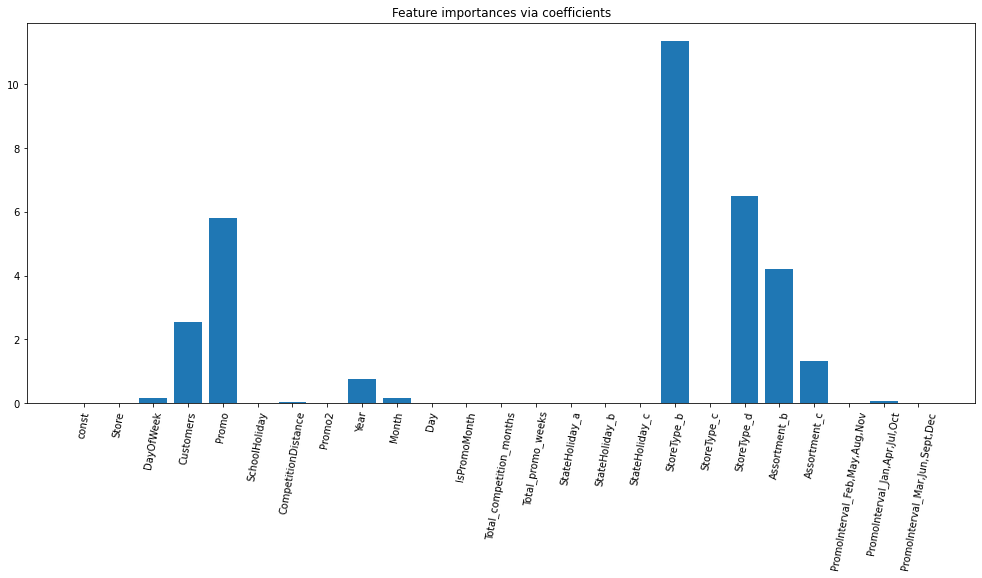

In [ ]:
plt.subplots(figsize=(17,7))
lasso = LassoCV()
lasso.fit(X,y)
importance = np.abs(lasso.coef_)
feature_names = X.columns
plt.bar(height=importance, x=feature_names)
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

# Let's Implement Linear Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
LR_model = LinearRegression()
LR_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_train_l = LR_model.predict(X_train)   # Prediction for train dataset
y_pred_test_l = LR_model.predict(X_test)     # Predictionfor test dataset

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
def rmpse(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true))))*100

    return loss



In [ ]:
MSE  = mean_squared_error((y_test**2), (y_pred_test_l**2))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMSPE = rmspe(y_test, y_pred_test_l)
print("RMSPE :", RMSPE)

r2 = r2_score((y_test**2), (y_pred_test_l**2))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test**2), (y_pred_test_l**2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1335224.8139914896
RMSE : 1155.5192832625034
RMSPE : 8.067085106334492
R2 : 0.837885508623557
Adjusted R2 :  0.8378694133181432


In [ ]:
 from sklearn.model_selection import cross_validate

In [ ]:
cv_results = cross_validate(LR_model, X, y, cv=3, scoring = 'r2')

In [ ]:
cv_results

{'fit_time': array([0.9279151 , 0.71246862, 0.69874525]),
 'score_time': array([0.02863121, 0.02824402, 0.02804899]),
 'test_score': array([0.84229229, 0.84832984, 0.84619853])}

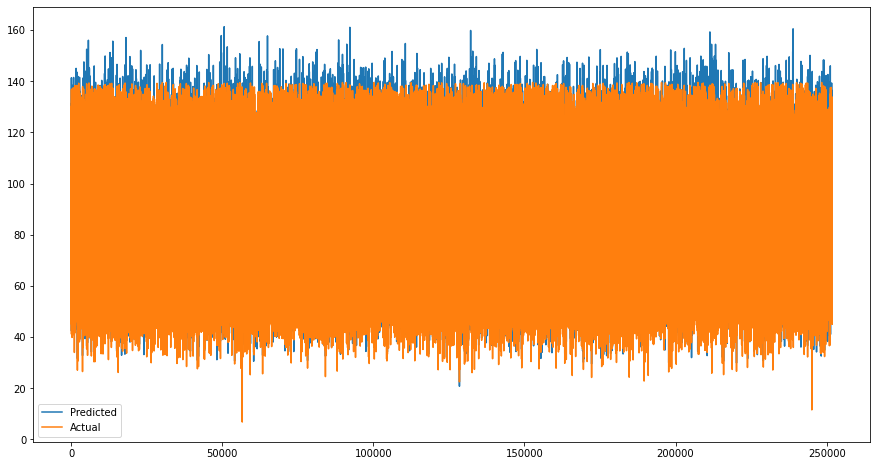

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(y_pred_test_l)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

# Implementing Decision Tree

In [ ]:
X = dataset_pr.drop(['Sales'], axis = 1)
y = dataset_pr['Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
# Criterion
criterion = ['mse']
# Maximum depth of trees
max_depth = [8,10,15,20, 30, 50]

# HYperparameter Grid
param_dict = {'max_depth' : max_depth, 'criterion':criterion}

param_dict

{'criterion': ['mse'], 'max_depth': [8, 10, 15, 20, 30, 50]}

In [ ]:
# Create an instance of the DecisionTreeClassifier
DTR_model = DecisionTreeRegressor()

# Grid search
DTR_grid = GridSearchCV(estimator = DTR_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring = 'r2')

DTR_grid.fit(X_train,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] criterion=mse, max_depth=8 ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... criterion=mse, max_depth=8, total=   2.3s
[CV] criterion=mse, max_depth=8 ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV] ....................... criterion=mse, max_depth=8, total=   2.1s
[CV] criterion=mse, max_depth=8 ......................................
[CV] ....................... criterion=mse, max_depth=8, total=   2.1s
[CV] criterion=mse, max_depth=10 .....................................
[CV] ...................... criterion=mse, max_depth=10, total=   2.5s
[CV] criterion=mse, max_depth=10 .....................................
[CV] ...................... criterion=mse, max_depth=10, total=   2.5s
[CV] criterion=mse, max_depth=10 .....................................
[CV] ...................... criterion=mse, max_depth=10, total=   2.5s
[CV] criterion=mse, max_depth=15 .....................................
[CV] ...................... criterion=mse, max_depth=15, total=   3.4s
[CV] criterion=mse, max_depth=15 .....................................
[CV] ...................... criterion=mse, max_depth=15, total=   3.5s
[CV] criterion=mse, max_depth=15 .....................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  1.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse'],
                         'max_depth': [8, 10, 15, 20, 30, 50]},
             pre_dispatch='2*n_jobs', refit=

In [ ]:
DTR_grid.best_params_

{'criterion': 'mse', 'max_depth': 20}

In [ ]:
DTR_optimal_model = DTR_grid.best_estimator_
DTR_optimal_model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
DTR_grid.best_score_

0.9417694576612886

In [ ]:
y_pred_train_DTR = DTR_optimal_model.predict(X_train)   # Prediction for train dataset
y_pred_test_DTR = DTR_optimal_model.predict(X_test)     # Predictionfor test dataset

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_test_DTR))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMSPE = rmspe(y_test, y_pred_test_DTR)
print("RMSPE :", RMSPE)

r2 = r2_score((y_test), (y_pred_test_DTR))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_test_DTR)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 420854.5311200391
RMSE : 648.7330199088367
RMSPE : 9.144725408602573
R2 : 0.948902523724045
Adjusted R2 :  0.9488976535291298


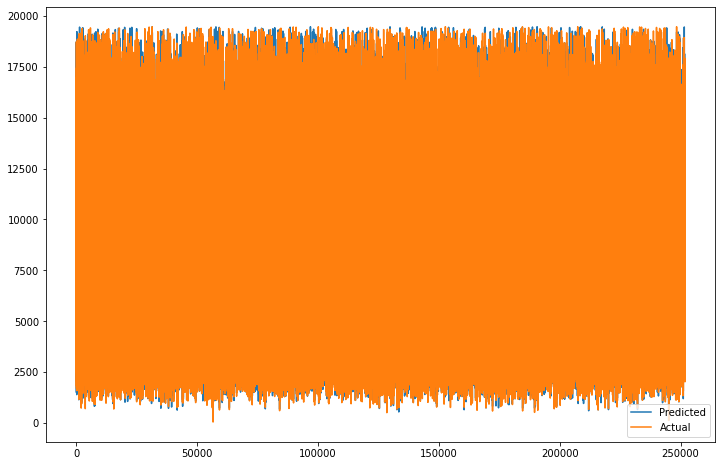

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y_pred_test_DTR)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

# Implementing RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Criterion
criterion = ['mse']
# Maximum depth of trees
max_depth = [20]

# Number of estimator
n_estimators = [20,50,100]
# HYperparameter Grid
param_dict = {'max_depth' : max_depth, 'criterion':criterion,'n_estimators':n_estimators}

param_dict

{'criterion': ['mse'], 'max_depth': [20], 'n_estimators': [20, 50, 100]}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=0)

In [ ]:
# Create an instance of the DecisionTreeClassifier
rf_model = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator = rf_model,
                       param_grid = param_dict,
                       cv = 3, verbose=2, scoring = 'r2', n_jobs = -1 )

rf_grid.fit(X_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] criterion=mse, max_depth=20, n_estimators=20 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... criterion=mse, max_depth=20, n_estimators=20, total=  58.8s
[CV] criterion=mse, max_depth=20, n_estimators=20 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.8s remaining:    0.0s


[CV] ..... criterion=mse, max_depth=20, n_estimators=20, total=  58.5s
[CV] criterion=mse, max_depth=20, n_estimators=20 ....................
[CV] ..... criterion=mse, max_depth=20, n_estimators=20, total=  58.4s
[CV] criterion=mse, max_depth=20, n_estimators=50 ....................
[CV] ..... criterion=mse, max_depth=20, n_estimators=50, total= 2.4min
[CV] criterion=mse, max_depth=20, n_estimators=50 ....................
[CV] ..... criterion=mse, max_depth=20, n_estimators=50, total= 2.4min
[CV] criterion=mse, max_depth=20, n_estimators=50 ....................
[CV] ..... criterion=mse, max_depth=20, n_estimators=50, total= 2.4min
[CV] criterion=mse, max_depth=20, n_estimators=100 ...................
[CV] .... criterion=mse, max_depth=20, n_estimators=100, total= 4.9min
[CV] criterion=mse, max_depth=20, n_estimators=100 ...................
[CV] .... criterion=mse, max_depth=20, n_estimators=100, total= 4.8min
[CV] criterion=mse, max_depth=20, n_estimators=100 ...................
[CV] .

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 24.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
rf_grid.best_params_

{'criterion': 'mse', 'max_depth': 20, 'n_estimators': 100}

In [ ]:
rf_optimal_model = rf_grid.best_estimator_

In [ ]:
y_pred_train_rf = rf_optimal_model.predict(X_train)   # Prediction for train dataset
y_pred_test_rf = rf_optimal_model.predict(X_test)     # Predictionfor test dataset

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_test_rf))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMSPE = rmspe(y_test, y_pred_test_rf)
print("RMSPE :", RMSPE)

r2 = r2_score((y_test), (y_pred_test_rf))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_test_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 240815.7177287383
RMSE : 490.7297807640558
RMSPE : 6.969763980332908
R2 : 0.9707616895776952
Adjusted R2 :  0.9707589028202831


# Implementing Light GBM

In [ ]:
import lightgbm as lgb

In [ ]:
# Maximum depth of trees
max_depth = [8, 10,15,20, 30]

# bagging fraction
bagging_fraction = [0.7, 0.8]

#max-bin
max_bin = [400, 500, 600]

# HYperparameter Grid
param_dict = {'max_depth' : max_depth, 'bagging_fraction':bagging_fraction, 'max_bin': max_bin}

param_dict

{'bagging_fraction': [0.7, 0.8],
 'max_bin': [400, 500, 600],
 'max_depth': [8, 10, 15, 20, 30]}

In [ ]:
# Create an instance of the LGBM
LGB = lgb.LGBMRegressor()

# Grid search
LGB_grid = GridSearchCV(estimator = LGB,
                       param_grid = param_dict,
                       cv = 3, verbose=2)

LGB_grid.fit(X_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] bagging_fraction=0.7, max_bin=400, max_depth=8 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... bagging_fraction=0.7, max_bin=400, max_depth=8, total=   5.9s
[CV] bagging_fraction=0.7, max_bin=400, max_depth=8 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.9s remaining:    0.0s


[CV] ... bagging_fraction=0.7, max_bin=400, max_depth=8, total=   5.8s
[CV] bagging_fraction=0.7, max_bin=400, max_depth=8 ..................
[CV] ... bagging_fraction=0.7, max_bin=400, max_depth=8, total=   5.7s
[CV] bagging_fraction=0.7, max_bin=400, max_depth=10 .................
[CV] .. bagging_fraction=0.7, max_bin=400, max_depth=10, total=   5.7s
[CV] bagging_fraction=0.7, max_bin=400, max_depth=10 .................
[CV] .. bagging_fraction=0.7, max_bin=400, max_depth=10, total=   5.8s
[CV] bagging_fraction=0.7, max_bin=400, max_depth=10 .................
[CV] .. bagging_fraction=0.7, max_bin=400, max_depth=10, total=   5.7s
[CV] bagging_fraction=0.7, max_bin=400, max_depth=15 .................
[CV] .. bagging_fraction=0.7, max_bin=400, max_depth=15, total=   5.8s
[CV] bagging_fraction=0.7, max_bin=400, max_depth=15 .................
[CV] .. bagging_fraction=0.7, max_bin=400, max_depth=15, total=   5.8s
[CV] bagging_fraction=0.7, max_bin=400, max_depth=15 .................
[CV] .

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  8.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_jobs=-1, num_leaves=31,
                                     objective=None, random_state=None,
                                     reg_alpha=0.0, reg_lambda=0.0, silent=True,
                                     subsample=1.0, subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='deprecated', n_jobs=None,
             param_grid={'bagging_fraction': [0.7, 0.8],
                         'max_bin': [400, 500, 600],
                         'max_depth': [8, 10, 15, 20, 30]},
          

In [ ]:
LGB_grid.best_params_

{'bagging_fraction': 0.7, 'max_bin': 500, 'max_depth': 20}

In [ ]:
LGB_optimal_model = LGB_grid.best_estimator_

In [ ]:
y_pred_train_LGBM = LGB_optimal_model.predict(X_train)   # Prediction for train dataset
y_pred_test_LGBM = LGB_optimal_model.predict(X_test)     # Predictionfor test dataset

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_test_LGBM))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMSPE = rmspe(y_test, y_pred_test_LGBM)
print("RMSPE :", RMSPE)

r2 = r2_score((y_test), (y_pred_test_LGBM))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_test_LGBM)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 535818.6807480459
RMSE : 731.9963666221615
RMSPE : 13.81146543592081
R2 : 0.9349443090113064
Adjusted R2 :  0.9349381084331458


# Now, It's time for stacking!!

In [ ]:
Stack_df = dataset_pr.copy()

In [ ]:
models = [
    DecisionTreeRegressor(max_depth=20, criterion = 'mse'),
    RandomForestRegressor(max_depth=20, n_estimators = 100,criterion='mse'),
    lgb.LGBMRegressor(bagging_fraction = 0.7, max_bin = 500, max_depth = 20)
]

In [ ]:
!pip install vecstack

In [ ]:
from vecstack import stacking

In [ ]:
S_train, S_test = stacking(models,                   
                           X_train, y_train, X_test,   
                           regression=True, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric= r2_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

/usr/local/lib/python3.6/dist-packages/vecstack/core.py:461: UserWarning: This is regression task hence classification-specific parameters set to <True> were ignored: <stratified>
  warnings.warn(warn_str, UserWarning)


task:         [regression]
metric:       [r2_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [DecisionTreeRegressor]
    fold  0:  [0.94503821]
    fold  1:  [0.94547678]
    fold  2:  [0.94385764]
    fold  3:  [0.94465969]
    ----
    MEAN:     [0.94475808] + [0.00059487]
    FULL:     [0.94475786]

model  1:     [RandomForestRegressor]
    fold  0:  [0.96918312]
    fold  1:  [0.96911872]
    fold  2:  [0.96845145]
    fold  3:  [0.96901483]
    ----
    MEAN:     [0.96894203] + [0.00028953]
    FULL:     [0.96894177]

model  2:     [LGBMRegressor]
    fold  0:  [0.93601662]
    fold  1:  [0.93706452]
    fold  2:  [0.93413600]
    fold  3:  [0.93545716]
    ----
    MEAN:     [0.93566858] + [0.00105633]
    FULL:     [0.93566809]



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor 

In [ ]:
model = GradientBoostingRegressor(n_estimators=100, max_depth =4, min_samples_split = 5, learning_rate= 0.01, random_state = 0)
model = model.fit(S_train, y_train)

In [ ]:
y_pred_test_stack = model.predict(S_test)
print('Final prediction score: [%.8f]' % r2_score(y_test, y_pred_test_stack))

Final prediction score: [0.83721053]


In [ ]:
S_test

array([[ 8971.31666667,  9210.69861334, 10761.74723961],
       [ 6218.68977796,  6262.27280135,  6550.68727918],
       [ 8546.75      ,  8415.56400107,  9748.11498038],
       ...,
       [14683.62908497, 15146.48242068, 15510.5330061 ],
       [ 4208.5125    ,  4165.30287561,  4579.88636723],
       [ 9864.29242424,  9685.86556815,  9026.0058471 ]])

In [ ]:
MSE  = mean_squared_error((y_test), (y_pred_test_stack))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMSPE = rmspe(y_test, y_pred_test_stack)
print("RMSPE :", RMSPE)

r2 = r2_score((y_test), (y_pred_test_stack))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_test_stack)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1340784.1389868418
RMSE : 1157.9223372000567
RMSPE : 29.85574649267642
R2 : 0.8372105307961726
Adjusted R2 :  0.837195015030954


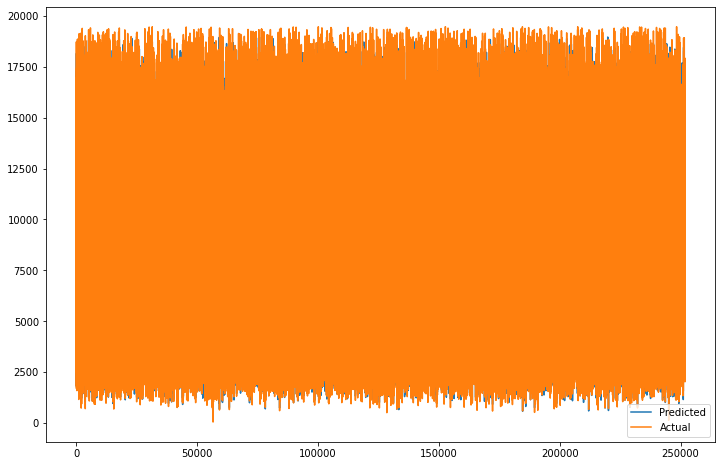

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(y_pred_test_stack)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()